In [1]:
## Import relevant libraries
import sys
sys.path.append('../../activedrops')

## Including ourselves
import pivdrops
pivdrops.set_plotting_style()

In [2]:
data_path = "../../data/012924-kif3-500ngul-NoCy5_3reps/"
condition1 = "500ngul"
subcondition1 = "rep1"
subcondition2 = "rep2"
subcondition3 = "rep3"


min_frame = 0
max_frame = None


# a = pivdrops.process_piv_data(data_path, condition1, subcondition1, min_frame=min_frame, max_frame=max_frame, plot_autocorrelation=True)
# b = pivdrops.process_piv_data(data_path, condition1, subcondition2, min_frame=min_frame, max_frame=max_frame, plot_autocorrelation=True)
# c = pivdrops.process_piv_data(data_path, condition1, subcondition3, min_frame=min_frame, max_frame=max_frame, plot_autocorrelation=True)



In [3]:
features_pca = [
    "vorticity [1/s]_mean",	
    "velocity magnitude [um/s]", 
    "divergence [1/s]_mean", 
    # "dcev [1]_mean", 
    "shear [1/s]_mean", 
    "strain [1/s]_mean", 
    # "vector direction [degrees]_mean", 
    "correlation length [um]", 
    "power [W]_mean",
    "work [J]", 
    ]

pivdrops.plot_features(
    [
        data_path, 
        data_path, 
        data_path
        ], 
    [
        condition1, 
        condition1, 
        condition1
        ], 
    [
        subcondition1, 
        subcondition2, 
        subcondition3
        ], 
    features_pca, 
    time_intervals=[
        3, 
        3,
        3
        ], 
    sigma=10,  
    min_frame=0, 
    max_frame=None,
    # trajectories=True,
    )


In [ ]:
# pivdrops.convert_images(data_path, condition1, subcondition1, max_frame=max_frame, brightness_factor=1, contrast_factor=1)
# pivdrops.convert_images(data_path, condition1, subcondition2, max_frame=max_frame, brightness_factor=1, contrast_factor=1)
# pivdrops.convert_images(data_path, condition1, subcondition3, max_frame=max_frame, brightness_factor=1, contrast_factor=1)

In [ ]:
v = 2E-6
velocity_limits = (0, v)
other_limits = (-0.0005, 0.0005)


# velocity_limits = (None, None)
# other_limits = (None, None)

feature_limits = {
    'u [m/s]': (-v, v), 
    'v [m/s]': (-v, v), 
    'data type [-]': (None, None),
    'velocity magnitude [m/s]': velocity_limits,
    'vorticity [1/s]': other_limits,
    'divergence [1/s]': other_limits,
    'dcev [1]': (0, 250),
    'shear [1/s]': other_limits,
    'strain [1/s]': other_limits,
    'vector direction [degrees]': (-180, 180),
}

min_frame = 0
max_frame = 765
   
pivdrops.piv_heatmap(a.iloc[min_frame:max_frame,:], data_path, condition1, subcondition1, feature_limits, time_interval=3)
# pivdrops.piv_heatmap(b.iloc[min_frame:max_frame,:], data_path, condition1, subcondition2, feature_limits, time_interval=3)
# pivdrops.piv_heatmap(c.iloc[min_frame:max_frame,:], data_path, condition1, subcondition3, feature_limits, time_interval=3)


pivdrops.create_heatmap_movies(data_path, condition1, subcondition1, feature_limits)
pivdrops.create_heatmap_movies(data_path, condition1, subcondition2, feature_limits)
pivdrops.create_heatmap_movies(data_path, condition1, subcondition3, feature_limits)




In [10]:
import os
import shutil

# Define the source and destination directories
source_dir = "../../data/013024-kif3_9phases-Cy5_GFP-30sint/phases_1/Pos8/"  # Replace with the path to your current folder
destination_dir = "../../data/013024-kif3_9phases-Cy5_GFP-30sint/phases_1/Pos8-Cy5/"  # Replace with the path to the folder where you want to move the files

# Check if the destination directory exists, create it if not
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Iterate over the files in the source directory
for filename in os.listdir(source_dir):
    # Check if 'cy5' is in the filename
    if 'cy5' in filename:
        # Construct the full file path
        file_path = os.path.join(source_dir, filename)
        # Move the file to the destination directory
        shutil.move(file_path, destination_dir)


In [3]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio.v2 as imageio
from PIL import Image, ImageDraw, ImageEnhance


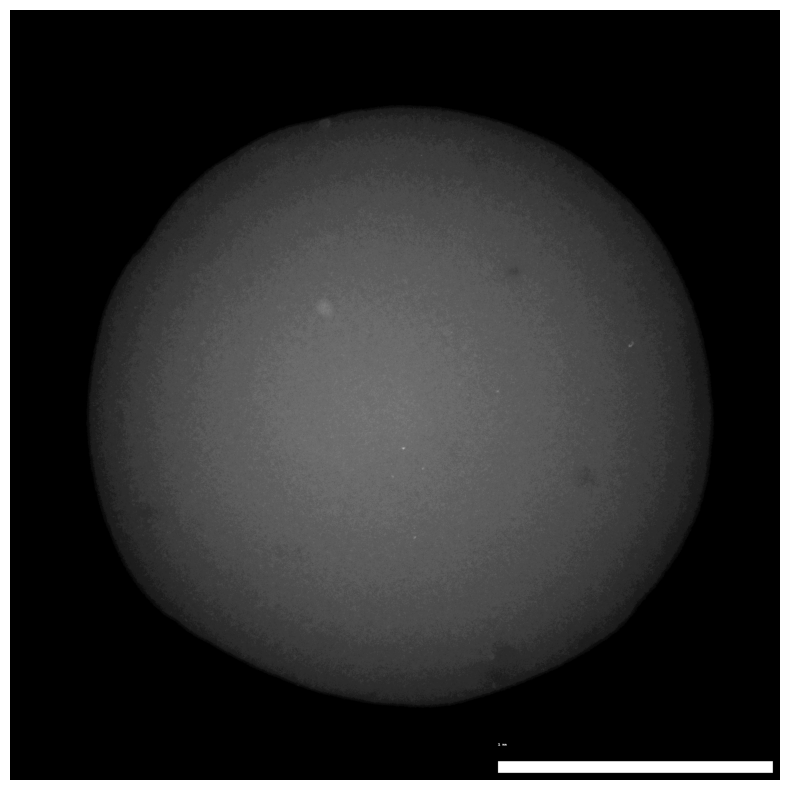

In [4]:
# Open the .tif image file
image_path = "../../data/kif3_phases/5MT/40DNA/cy5_rgb/img_000000000_cy5-4x_000.tif"

tif_image = Image.open(image_path)

# Check the image mode and convert to RGB if necessary
tif_image = tif_image.convert('RGB')

# Adjust contrast
contrast_enhancer = ImageEnhance.Contrast(tif_image)
contrast_factor = 4  # Adjust to change contrast
tif_image = contrast_enhancer.enhance(contrast_factor)

# Adjust brightness
brightness_enhancer = ImageEnhance.Brightness(tif_image)
brightness_factor = 4  # Adjust to change brightness
tif_image = brightness_enhancer.enhance(brightness_factor)

# Create an ImageDraw object
draw = ImageDraw.Draw(tif_image)

# Parameters for the scale bar
bar_length_px = 730  # Length in pixels
bar_thickness = 30   # Thickness in pixels
bar_color = 'white'  # Color of the scale bar
bar_position = (tif_image.width - 20, tif_image.height - 20)  # Position for scale bar

# Draw the scale bar
bar_start = (bar_position[0] - bar_length_px, bar_position[1] - bar_thickness)
bar_end = bar_position
draw.rectangle([bar_start, bar_end], fill=bar_color)

# Draw a text label for the scale bar and adjust text size
bar_label = "1 mm"
text_position = (bar_start[0], bar_start[1] - 50)
draw.text(text_position, bar_label, fill=bar_color)


plt.figure(figsize=(10, 10))  # Increase the figure size
plt.imshow(tif_image)
plt.axis('off')  # Hide the axis
plt.show()

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageEnhance
import numpy as np
import os
import glob

def process_and_annotate_images_matplotlib(data_path, condition, subcondition, channel, brightness_factor=1, contrast_factor=1, min_frame=0, max_frame=None, time_interval=3):
    """
    Processes and annotates images using Matplotlib for text rendering. Adds a scale bar with a label and a timestamp indicating the elapsed time based on a specified interval.

    Args:
    - data_path (str): The base directory where the images are stored.
    - condition (str): The condition defining a subdirectory within the data path.
    - subcondition (str): The subcondition defining a further subdirectory.
    - channel (str): The specific channel being processed ('cy5' or 'gfp').
    - brightness_factor (float): Factor to adjust the brightness of the images.
    - contrast_factor (float): Factor to adjust the contrast of the images.
    - min_frame (int): Minimum frame number to start processing from.
    - max_frame (int, optional): Maximum frame number to stop processing at.
    - time_interval (int): Time interval in seconds between frames.
    """
    
    # Determine the directory paths based on the channel
    if channel == "cy5":
        directory_path = os.path.join(data_path, condition, subcondition, "cy5_rgb")
        out_path = os.path.join(data_path, condition, subcondition, "cy5_processed")
    elif channel == "gfp":
        directory_path = os.path.join(data_path, condition, subcondition, "gfp_rgb")
        out_path = os.path.join(data_path, condition, subcondition, "gfp_processed")
    else:
        raise ValueError("Invalid channel specified")

    # Create the output directory if it doesn't exist
    os.makedirs(out_path, exist_ok=True)

    # Collect and optionally limit the files to process
    tif_files = sorted(glob.glob(os.path.join(directory_path, "*.tif")))
    tif_files = tif_files[min_frame:max_frame]
    
    for i, image_path in enumerate(tif_files, start=min_frame):
        img = Image.open(image_path).convert('RGB')

        # Adjust brightness and contrast
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(contrast_factor)
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(brightness_factor)

        # Convert PIL image to numpy array for Matplotlib
        img_arr = np.array(img)

        fig, ax = plt.subplots()
        ax.imshow(img_arr)

        # Scale bar and timestamp parameters
        bar_length_px = 730
        bar_thickness = 20
        bar_color = 'white'
        bar_label = "1 mm"
        text_size = 20
        
        # Draw the scale bar
        rect = patches.Rectangle((img_arr.shape[1] - bar_length_px - 20, img_arr.shape[0] - bar_thickness - 20), bar_length_px, bar_thickness, linewidth=1, edgecolor=bar_color, facecolor=bar_color)
        ax.add_patch(rect)
        
        # Add text label for the scale bar
        plt.text(img_arr.shape[1] - bar_length_px + 200, img_arr.shape[0] - bar_thickness - 35, bar_label, color=bar_color, fontsize=text_size)
        
        # Calculate time elapsed and add timestamp
        time_elapsed = (i * time_interval) / 60  # Convert to minutes
        timestamp = f"{time_elapsed:.2f} min"
        plt.text(100, 120, timestamp, color='white', fontsize=text_size)  # Position in upper left corner
        plt.text(500, 120, 'min', color='white', fontsize=text_size)  # Additional text for clarity
        plt.text(800, 120, f"{condition}, {subcondition}", color='white', fontsize=text_size - 5)  # Condition and subcondition

        plt.axis('off')
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())

        # Save the figure without white frame
        output_path = os.path.join(out_path, "annotated_" + os.path.basename(image_path))
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=250)
        plt.close()

# Example usage
data_path = "../../data/kif3_phases/"
condition = "5MT"
subcondition = "40DNA"
channel = "gfp"
process_and_annotate_images_matplotlib(data_path, condition, subcondition, channel, brightness_factor=4, contrast_factor=4, min_frame=400, max_frame=None, time_interval=3)


KeyboardInterrupt: 